<h1>3 Types of Methods to Find Outliner in a dataSet.</h1>

<h3>1. Z-Score detection and Removal</h3>

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [36]:
df=pd.read_csv('placement.csv')
print(df.shape)
df.sample(5)

(1000, 3)


,cgpa,placement_exam_marks,placed
169,6.19,16.0,1
988,5.64,37.0,1
53,6.69,33.0,1
573,7.23,54.0,1
848,7.20,27.0,1


C:\Users\Sahil sharma\AppData\Local\Temp\ipykernel_20616\2931562495.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\Sahil sharma\AppData\Local\Temp\ipykernel_20616\2931562495.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


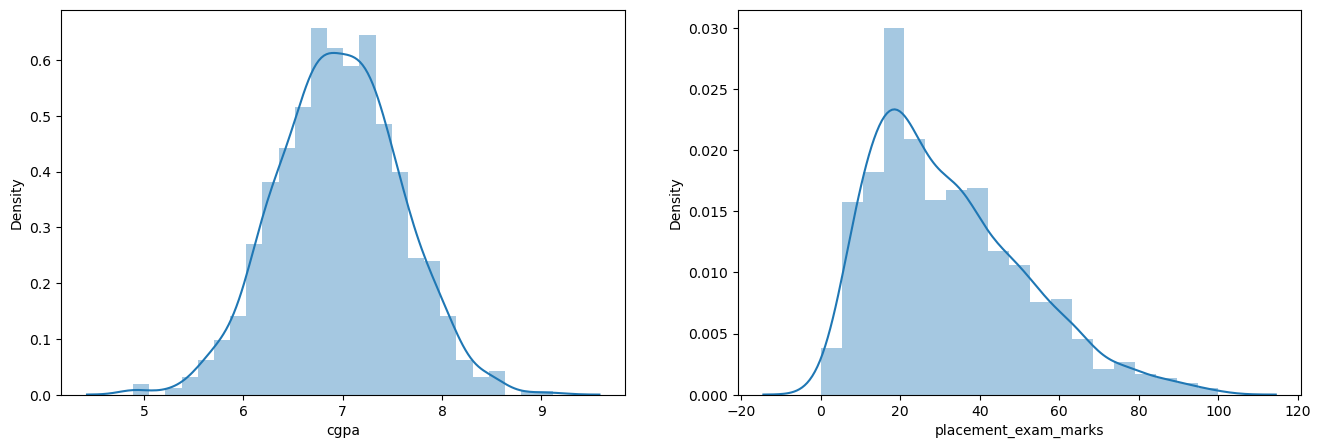

In [37]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [54]:
# Here cgpa shows Normal distribution curve.
minBound=df['cgpa'].mean()-3*df['cgpa'].std()
maxBound=df['cgpa'].mean()+3*df['cgpa'].std()
print(minBound,maxBound)

# or Z-SCORE Method.
# df['cgpa_zscore']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()
# df[df['cgpa_zscore']>3]  #Outliner detection.
# df[df['cgpa_zscore']<3]  #Outliner detection.

5.123881598222819 8.79913725668534


In [55]:
# Outliner detection.
df[(df['cgpa']>maxBound) | (df['cgpa']<minBound)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,5.123433,44.0,1,-3.000732
995,8.799564,44.0,1,3.000696
996,8.799564,65.0,1,3.000696
997,5.123433,34.0,0,-3.000732
999,5.123433,10.0,1,-3.000732


In [57]:
#Outliner treating.
# 2 Methods.


# Method 1:- Trimming.
# df[(df['cgpa']<=8.80) & (df['cgpa']>=5.11)]

# Method 2:- Capping.
df['cgpa']=np.where(
        df['cgpa']>maxBound,
        maxBound,
        np.where(
            df['cgpa']<minBound,
            minBound,
            df['cgpa']
        )
)

In [60]:
df['cgpa'].describe()  #Here we can see that minimum and Maximum values are changed.

count    1000.000000
mean        6.961510
std         0.612536
min         5.123882
25%         6.550000
50%         6.960000
75%         7.370000
max         8.799137
Name: cgpa, dtype: float64

<h3>2. IQR(InterQuantile Range) Method</h3>

In [61]:
df=pd.read_csv('placement.csv')
print(df.shape)
df.head()

(1000, 3)


,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\Users\Sahil sharma\AppData\Local\Temp\ipykernel_20616\3609021537.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\Sahil sharma\AppData\Local\Temp\ipykernel_20616\3609021537.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


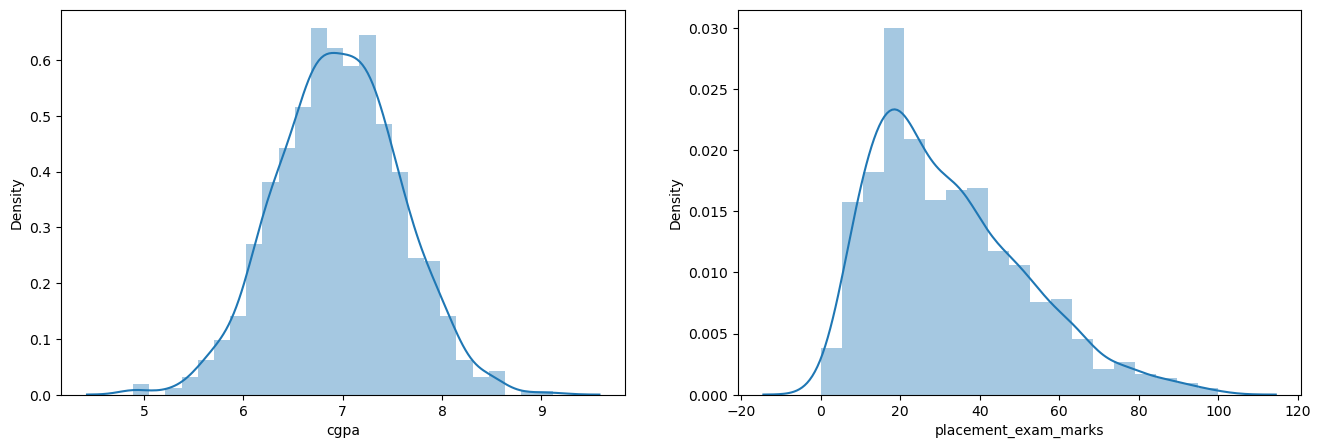

In [62]:
# This method is used when grap is skewed.
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [64]:
# By observing above grap we can say that placement_exam_marks is skewed graph and below reading say so too.
print(df['cgpa'].skew(),df['placement_exam_marks'].skew())

df.describe()

-0.014529938929314918 0.8356419499466834


,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


<Axes: ylabel='placement_exam_marks'>

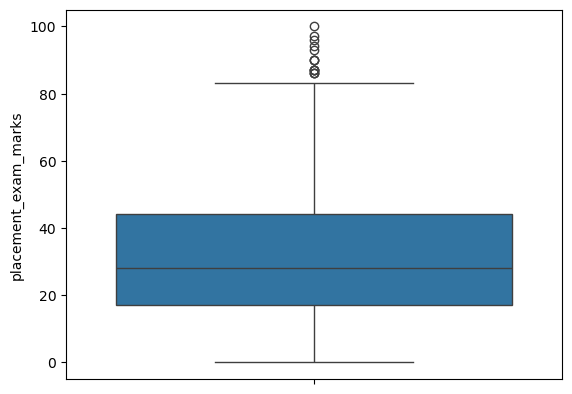

In [65]:
sns.boxplot(df['placement_exam_marks'])

In [69]:
percentile75=df['placement_exam_marks'].quantile(0.75)
percentile25=df['placement_exam_marks'].quantile(0.25)
iqr=percentile75-percentile25
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr
print(percentile75,percentile25,iqr,upper_limit,lower_limit)

# Outliner detection
df[(df['placement_exam_marks']>upper_limit) | (df['placement_exam_marks']<lower_limit)].shape #So here 15 outliers are present.

44.0 17.0 27.0 84.5 -23.5


(15, 3)

<Axes: ylabel='placement_exam_marks'>

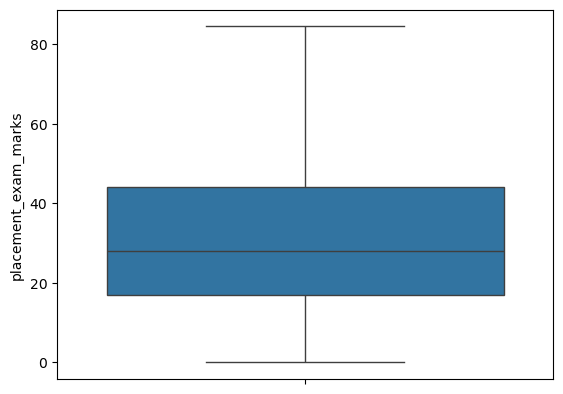

In [74]:
#Outliner Treat.

# Method 1 :- Trimming.
# df[(df['placement_exam_marks']<=upper_limit) & (df['placement_exam_marks']>=lower_limit)].shape

# Method 2 :- Capping.
df['placement_exam_marks']=np.where(
        df['placement_exam_marks']>upper_limit,
        upper_limit,
        np.where(
            df['placement_exam_marks']<lower_limit,
            lower_limit,
            df['placement_exam_marks']
        )
)
sns.boxplot(df['placement_exam_marks'])

<h3>3. Winsorization Method.</h3>

In [75]:
# In this method we will assume a percentile and then find upper and lower limit i.e. upper=max-percentile, lower=min+percentile

In [76]:
df=pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [79]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


C:\Users\Sahil sharma\AppData\Local\Temp\ipykernel_20616\3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

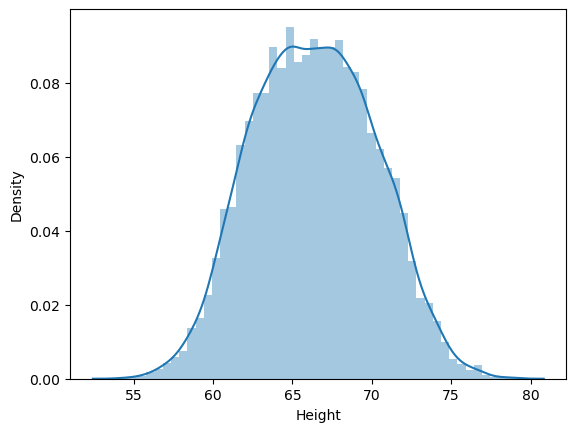

In [77]:
sns.distplot(df['Height'])

<Axes: ylabel='Height'>

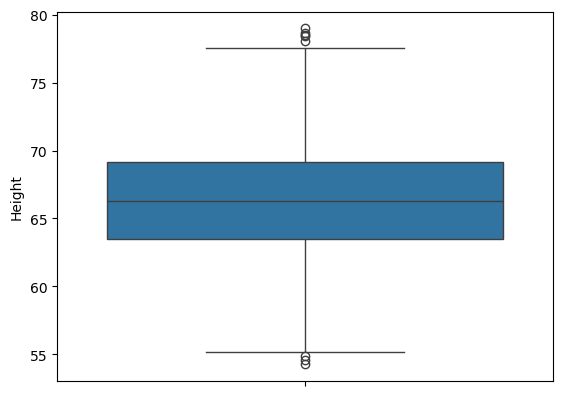

In [78]:
sns.boxplot(df['Height'])

In [80]:
upper_limit=df['Height'].quantile(0.99)
lower_limit=df['Height'].quantile(0.01)
print(upper_limit,lower_limit)

74.7857900583366 58.13441158671655


In [81]:
# Outliner detection
df[(df['Height']>upper_limit) | (df['Height']<lower_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


<Axes: ylabel='Height'>

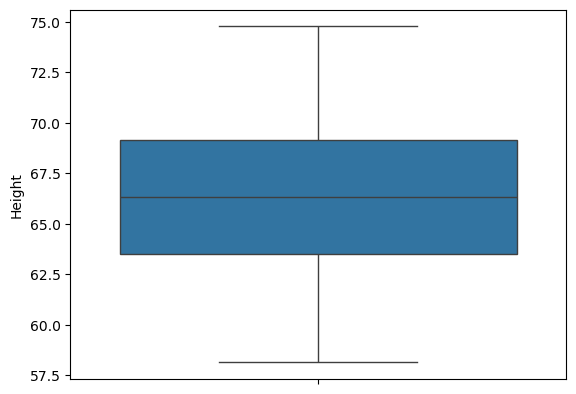

In [83]:
# Outliner Treat.

# Method 1 :- Trimming.
# df[(df['Height']<=upper_limit) & (df['Height']>=lower_limit)]


# Method 2 :- Here capping is nothing but Winsorization.
df['Height']=np.where(
        df['Height']>upper_limit,
        upper_limit,
        np.where(
            df['Height']<lower_limit,
            lower_limit,
            df['Height']
        )
)
sns.boxplot(df['Height'])